In [1]:
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,Softmax,GlobalAveragePooling2D,AveragePooling2D
from keras.models import Sequential
import tensorflow as tf
import keras
from keras.applications import ResNet50
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
import efficientnet.keras as efn 


Using TensorFlow backend.


In [17]:
#model = efn.EfficientNetB3(weights='imagenet',include_top=False,input_shape=(300,300, 3))
#model = ResNet50(weights='imagenet',include_top=False,input_shape=(299,299, 3))
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224, 3))

In [ ]:
from keras.models import Model


x = Conv2D(256,(3,3))(model.output)
x = BatchNormalization()(x)
x =Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.003))(x)
x = Dropout(0.4)(x)
x = Dense(2, activation='sigmoid')(x)
model= Model(model.inputs, x)

In [18]:
from keras.models import Model
from keras.layers import *
#x =Flatten()(model.output)
x = GlobalAveragePooling2D()(model.output)
#x = Dropout(0.5)(x)
#x = Dense(32, activation='relu')(x)
#x = Dropout(0.2)(x)
x = Dense(2, activation='sigmoid')(x)
model= Model(model.inputs, x)

In [19]:
print(len(model.layers))
#for layer in model.layers[:-90]:
#for layer in model.layers:
    #layer.trainable = True

model.summary()

177
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activa

In [20]:
cd

/home/ubuntu


In [21]:

train_path= r"FluAI CNN/Train"
valid_path= r"FluAI CNN/Valid"
test_path=r"FluAI CNN/Test"
#train_batches=ImageDataGenerator(rescale=1./255).flow_from_directory(train_path,target_size=(299,299),batch_size=64)

In [22]:
train_batches=ImageDataGenerator(preprocessing_function=efn.preprocess_input).flow_from_directory(train_path,target_size=(224,224),batch_size=32)
train_batches.class_indices

Found 852 images belonging to 2 classes.


{'Sick': 0, 'Well': 1}

In [23]:
valid_batches=ImageDataGenerator(preprocessing_function=efn.preprocess_input).flow_from_directory(valid_path,target_size=(224,224),batch_size=1)

Found 126 images belonging to 2 classes.


In [24]:
model.compile(Adam(lr=.0001),loss='binary_crossentropy',metrics=["accuracy"])

In [25]:
model.fit_generator(train_batches,steps_per_epoch=27,validation_data=valid_batches,validation_steps=5,epochs=30,verbose=2)

Epoch 1/30
 - 27s - loss: 0.2431 - acc: 0.9036 - val_loss: 0.2509 - val_acc: 0.8000
Epoch 2/30
 - 10s - loss: 0.0095 - acc: 1.0000 - val_loss: 3.7022e-04 - val_acc: 1.0000
Epoch 3/30
 - 11s - loss: 0.0024 - acc: 1.0000 - val_loss: 9.8494e-06 - val_acc: 1.0000
Epoch 4/30
 - 11s - loss: 0.0129 - acc: 0.9983 - val_loss: 0.8022 - val_acc: 0.6000
Epoch 5/30
 - 11s - loss: 0.0147 - acc: 0.9965 - val_loss: 0.0290 - val_acc: 1.0000
Epoch 6/30
 - 11s - loss: 0.0036 - acc: 1.0000 - val_loss: 1.9161 - val_acc: 0.6000
Epoch 7/30
 - 11s - loss: 0.0030 - acc: 1.0000 - val_loss: 5.0658e-05 - val_acc: 1.0000
Epoch 8/30
 - 11s - loss: 9.0231e-04 - acc: 1.0000 - val_loss: 1.4959 - val_acc: 0.8000
Epoch 9/30
 - 11s - loss: 7.1227e-04 - acc: 1.0000 - val_loss: 0.1997 - val_acc: 0.8000
Epoch 10/30
 - 11s - loss: 5.4808e-04 - acc: 1.0000 - val_loss: 1.2987 - val_acc: 0.8000
Epoch 11/30
 - 11s - loss: 5.1787e-04 - acc: 1.0000 - val_loss: 2.1115 - val_acc: 0.8000
Epoch 12/30
 - 11s - loss: 2.6871e-04 - acc: 1

In [12]:
from keras.applications.resnet50 import preprocess_input

import cv2
def hazırla(x):
    a=plt.imread(x)
    b=cv2.resize(a,(224,224))
    c=np.expand_dims(b,0)
    return(c)
def göster(x):
    a=plt.imread(x)
    a=cv2.resize(a,(224,224))
    plt.imshow(efn.preprocess_input(a))
    plt.show()

In [13]:
from keras.applications.resnet50 import preprocess_input
from PIL import Image
import cv2
import PIL.ExifTags as ExifTags
def kontrol(x):
    try: 
        image= Image.open(x)
        for orientation in ExifTags.TAGS.keys() : 
            if ExifTags.TAGS[orientation]=='Orientation' : 
                break 
        exif=dict(image._getexif().items())

        image=np.asanyarray(image)
        print("exif var")
        if exif[orientation] == 3:
            image = np.rot90(image,2)
        elif exif[orientation] == 6:
            image = np.rot90(image,3)
        elif exif[orientation] == 8:
            image = np.rot90(image,1)  
    except:
        image= Image.open(x)
        image=np.asanyarray(image)
        
        print("exif datası yok ")
    return(image)
#efn.preprocess_input(c)
def res(x):
    image=cv2.resize(x,(224,224))
    c=np.expand_dims(image,0)
    return(efn.preprocess_input(c))



In [4]:
from keras.models import load_model
model=load_model(r"C:\Users\user\Desktop\Zlik yap\Covid.h5")

W0325 23:54:09.266938  8284 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0325 23:54:09.363717  8284 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0325 23:54:09.387768  8284 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0325 23:54:09.387768  8284 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instea

In [5]:
import matplotlib.pyplot as plt
import numpy as np
directory=r"C:\Users\user\Desktop\asd\data\44.jpg"
directory=kontrol(directory)
pred2=model.predict(res(directory))
ind=np.argmax(pred2[0])
predx=np.round(pred2[:,0])
print(predx)
if predx==[0.]:
    print("Viral-Normal")
    print(pred2[0][1])
else:
    print(pred2[0][0])
    print("Yüksek olasılıkla Bakteriyel Enfeksiyon")
plt.imshow(directory)

exif var
[0.]
Viral-Normal
0.0


In [14]:

from keras import backend as k
vector=model.output[:,ind]
last_conv=model.get_layer("top_conv")
grads=k.gradients(vector,last_conv.output)[0]
pooled_grad=k.mean(grads,axis=(0,1,2))
iterate=k.function([model.input],[pooled_grad,last_conv.output[0]])
pooled_grad_value,conv_layer_value=iterate([res(directory)])
for i in range(1536):
    conv_layer_value[:,:,i] *= pooled_grad_value[i]
heatmap=np.mean(conv_layer_value,axis=-1)

NameError: name 'ind' is not defined

In [ ]:
plt.rcParams["figure.figsize"]=(16,8)
#directory=cv2.resize(directory,(500,500))
img=directory
heatmap=np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
heatmap=cv2.resize(heatmap,(img.shape[1],img.shape[0]))
heatmap=np.uint8(255*heatmap)
i=5
heatmap=cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)
z=heatmap*0.4+img
fig = plt.imshow(z/255)
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig('heat{}.jpg'.format(i), bbox_inches='tight', pad_inches =0)


In [21]:
cd

/home/ubuntu


In [26]:
model.save('FluAıeff275_model.h5',include_optimizer=False)

In [3]:
from keras.models import load_model
model=load_model(r"C:\Users\user\Tensorflow\FluAıeff11_model.h5")

W0205 12:27:05.399663  8460 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0205 12:27:05.422593  8460 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0205 12:27:05.422593  8460 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0205 12:27:05.423557  8460 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instea

W0203 18:01:25.922791 18984 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


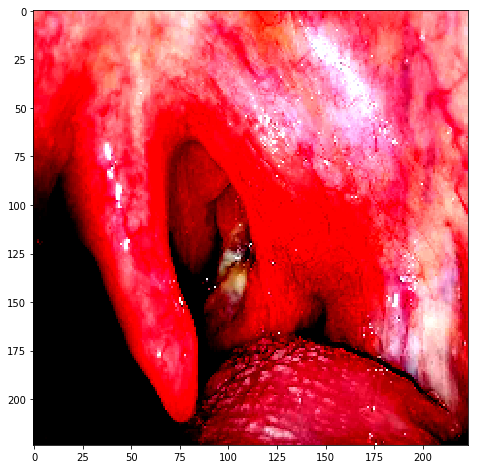

In [20]:
göster(r"C:\Users\user\Desktop\Test\47582171_493168461087520_7128685245312609738_n.jpg")

In [54]:
import matplotlib.pyplot as plt
import numpy as np
    directory=r"C:\Users\user\Desktop\Klinik Çalışma\IMG_20191219_091604 - hande toptan.jpg"
    directory=kontrol(directory)
    pred2=model.predict(res(directory))
    ind=np.argmax(pred2[0])
    predx=np.round(pred2[:,0])
    print(predx)
    if predx==[0.]:
        print("Viral-Normal")
        print(pred2[0][1])
    else:
        print(pred2[0][0])
        print("Yüksek olasılıkla Bakteriyel Enfeksiyon")
        

IndentationError: unexpected indent (<ipython-input-54-f5a89c1619b8>, line 3)

C:\Users\user\Desktop\asd\data\1.jpg
exif var


W0205 12:28:33.951032  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\2.jpg
exif var


W0205 12:28:36.777473  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\3.jpg
exif var


W0205 12:28:39.880521  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\4.jpg
exif var


W0205 12:28:43.811007  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\5.jpg
exif var


W0205 12:28:48.151718  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\6.jpg
exif var


W0205 12:28:52.402295  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\7.jpg
exif var


W0205 12:28:56.725718  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\8.jpg
exif var


W0205 12:29:01.395474  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\9.jpg
exif var


W0205 12:29:06.325287  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\10.jpg
exif var


W0205 12:29:11.500627  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\11.jpg
exif var


W0205 12:29:17.360949  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\12.jpg
exif var


W0205 12:29:23.345232  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\13.jpg
exif var


W0205 12:29:29.688949  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\14.jpg
exif var


W0205 12:29:35.878954  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\15.jpg
exif var


W0205 12:29:42.758903  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\16.jpg
exif var


W0205 12:29:50.779895  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\17.jpg
exif var


W0205 12:29:58.843553  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\18.jpg
exif var


W0205 12:30:06.427348  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\19.jpg
exif var


W0205 12:30:14.307272  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\20.jpg
exif var


W0205 12:30:22.596099  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\21.jpg
exif var


W0205 12:30:30.452086  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\22.jpg
exif var


W0205 12:30:39.350459  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\23.jpg
exif var


W0205 12:30:48.287554  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\24.jpg
exif var


W0205 12:30:57.122240  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\25.jpg
exif var


W0205 12:31:06.741673  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\26.jpg
exif var


W0205 12:31:16.541472  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\27.jpg
exif var


W0205 12:31:26.835156  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\28.jpg
exif var


W0205 12:31:37.545507  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\29.jpg
exif var


W0205 12:31:47.596451  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\30.jpg
exif var


W0205 12:31:58.891241  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\31.jpg
exif var


W0205 12:32:10.027453  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\32.jpg
exif var


W0205 12:32:21.200567  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\33.jpg
exif var


W0205 12:32:33.092221  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\34.jpg
exif var


W0205 12:32:45.163968  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\35.jpg
exif var


W0205 12:32:56.992292  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\36.jpg
exif var


W0205 12:33:08.829802  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\37.jpg
exif var


W0205 12:33:21.901854  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\38.jpg
exif var


W0205 12:33:34.855473  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\39.jpg
exif var


W0205 12:33:50.812907  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\40.jpg
exif var


W0205 12:34:05.500649  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\41.jpg
exif var


W0205 12:34:20.710472  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\42.jpg
exif var


W0205 12:34:36.744546  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\43.jpg
exif var


W0205 12:34:53.403102  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\44.jpg
exif var


W0205 12:35:10.412452  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\45.jpg
exif var


W0205 12:35:27.529760  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\46.jpg
exif var


W0205 12:35:44.891271  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\47.jpg
exif var


W0205 12:36:02.736449  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\48.jpg
exif var


W0205 12:36:19.371129  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\49.jpg
exif var


W0205 12:36:39.991474  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\50.jpg
exif var


W0205 12:36:57.616539  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\user\Desktop\asd\data\51.jpg
exif var


W0205 12:37:14.030161  8460 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


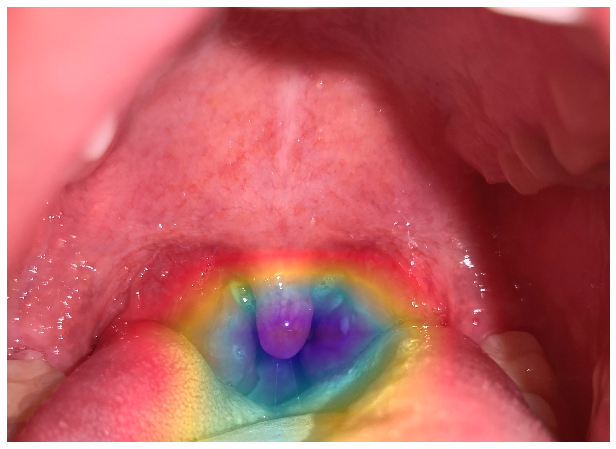

In [12]:
import os
import cv2
cevap=[]
DATADIR = r"C:\Users\user\Desktop\asd"
CATEGORIES = ["data"]
plt.figure(figsize=(18,8))
for category in CATEGORIES:  # do dogs and cats

    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    
    for j in range(1,52):  # iterate over each image per dogs and 
        directory=r"C:\Users\user\Desktop\asd\data\{}.jpg".format(j)
        print(directory)
        directory=kontrol(directory)
        pred2=model.predict(res(directory))
        ind=np.argmax(pred2[0])
        predx=np.round(pred2[:,0])
        vector=model.output[:,ind]
        last_conv=model.get_layer("top_conv")
        grads=k.gradients(vector,last_conv.output)[0]
        pooled_grad=k.mean(grads,axis=(0,1,2))
        iterate=k.function([model.input],[pooled_grad,last_conv.output[0]])
        pooled_grad_value,conv_layer_value=iterate([res(directory)])
        for i in range(1536):
            conv_layer_value[:,:,i] *= pooled_grad_value[i]
        heatmap=np.mean(conv_layer_value,axis=-1)
        plt.rcParams["figure.figsize"]=(16,8)
#directory=cv2.resize(directory,(500,500))
        img=directory
        heatmap=np.maximum(heatmap,0)
        heatmap /= np.max(heatmap)
        heatmap=cv2.resize(heatmap,(img.shape[1],img.shape[0]))
        heatmap=np.uint8(255*heatmap)
        i=5
        heatmap=cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)
        z=heatmap*0.4+img
        fig = plt.imshow(z/255)
        plt.axis('off')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        plt.savefig('heat{}.jpg'.format(j), bbox_inches='tight', pad_inches =0)
        

In [42]:
import os
import cv2
cevap=[]
DATADIR = r"C:\Users\user\Desktop\asd"
CATEGORIES = ["data"]
plt.figure(figsize=(18,8))
for category in CATEGORIES:  # do dogs and cats

    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    
    for j in range(1,52):  # iterate over each image per dogs and 
        directory=r"C:\Users\user\Desktop\asd\data\{}.jpg".format(j)
        print(directory)
        directory=kontrol(directory)
        pred2=model.predict(res(directory))
        ind=np.argmax(pred2[0])
        predx=np.round(pred2[:,0])

[['Viral-Normal', 0.74212956],
 ['Yüksek olasılıkla Bakteriyel Enfeksiyon', 0.57935166],
 ['Viral-Normal', 0.758416],
 ['Viral-Normal', 0.66432446],
 ['Yüksek olasılıkla Bakteriyel Enfeksiyon', 0.7660017],
 ['Viral-Normal', 0.6994265],
 ['Viral-Normal', 0.83542144],
 ['Viral-Normal', 0.72778803],
 ['Viral-Normal', 0.8324625],
 ['Viral-Normal', 0.5321971],
 ['Yüksek olasılıkla Bakteriyel Enfeksiyon', 0.64519334],
 ['Yüksek olasılıkla Bakteriyel Enfeksiyon', 0.81833524],
 ['Viral-Normal', 0.6439835],
 ['Yüksek olasılıkla Bakteriyel Enfeksiyon', 0.79868686],
 ['Viral-Normal', 0.82572186],
 ['Yüksek olasılıkla Bakteriyel Enfeksiyon', 0.5724469],
 ['Yüksek olasılıkla Bakteriyel Enfeksiyon', 0.50649863],
 ['Yüksek olasılıkla Bakteriyel Enfeksiyon', 0.5145568],
 ['Yüksek olasılıkla Bakteriyel Enfeksiyon', 0.58950806],
 ['Viral-Normal', 0.6813133],
 ['Viral-Normal', 0.62895036],
 ['Yüksek olasılıkla Bakteriyel Enfeksiyon', 0.56374675],
 ['Viral-Normal', 0.71015656],
 ['Yüksek olasılıkla Bakter